In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)
%matplotlib inline

The data processed here came from previous projects at UTK/FAC recorded using Tinytag data loggers.

Key takeaways:
* Time range covered by the data: part of 2014, part of 2015, 2016, part of 2017, part of 2019, 2020, and part of 2021
* Weather features included in data: temperature (celcius) and relative humidity (%)
* The data was found to contain several errors (e.g., negative temp values in the summer and a relative humidity of 0% in the summer). See data analysis section for details. Given this, the data will be compared with the local climatological data (LCD) in a seperate notebook (project_lcd_comparison.ipynb).
   * Examples in raw data see file "Tox016 ADH Calculations Completed.xlsx"

# PHP project

In [4]:
temp_hum_a = pd.read_excel('data/PHR/Temp and Humidity A Trial 1.xlsx',
                          header=None, skiprows=5, usecols=[1,2,3])
temp_hum_a.columns = ['date_time', 'temp_C', 'hum_RH']
temp_hum_b = pd.read_excel('data/PHR/Temp and Humidity B Trial 1.xlsx',
                          header=None, skiprows=5, usecols=[1,2,3])
temp_hum_b.columns = ['date_time', 'temp_C', 'hum_RH']
temp_hum_c = pd.read_excel('data/PHR/Temp and Humidity C Trial 1.xlsx',
                          header=None, skiprows=5, usecols=[1,2,3])
temp_hum_c.columns = ['date_time', 'temp_C', 'hum_RH']

In [5]:
display(temp_hum_a.head())
print(temp_hum_a.shape)
display(temp_hum_b.head())
print(temp_hum_b.shape)
display(temp_hum_c.head())
print(temp_hum_c.shape)

,date_time,temp_C,hum_RH
0,2014-03-14 17:31:00,17.16219,23.475
1,2014-03-14 18:31:00,16.50121,22.769
2,2014-03-14 19:31:00,15.84665,25.357
3,2014-03-14 20:31:00,15.60761,25.122
4,2014-03-14 21:31:00,15.47507,25.827


(2161, 3)


,date_time,temp_C,hum_RH
0,2014-03-14 17:32:00,17.11048,24.388
1,2014-03-14 18:32:00,16.04527,26.270
2,2014-03-14 19:32:00,15.04107,28.387
3,2014-03-14 20:32:00,14.35932,30.033
4,2014-03-14 21:32:00,14.17560,29.798


(2161, 3)


,date_time,temp_C,hum_RH
0,2014-03-14 17:33:00,16.85333,23.761
1,2014-03-14 18:33:00,15.84090,25.808
2,2014-03-14 19:33:00,14.92707,27.854
3,2014-03-14 20:33:00,14.37089,28.309
4,2014-03-14 21:33:00,14.21901,29.674


(2161, 3)


In [105]:
print(temp_hum_a.info())
print(temp_hum_b.info())
print(temp_hum_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  2161 non-null   datetime64[ns]
 1   temp_C     2161 non-null   float64       
 2   hum_RH     2161 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 50.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  2161 non-null   datetime64[ns]
 1   temp_C     2161 non-null   float64       
 2   hum_RH     2161 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 50.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  ---

In [106]:
print(temp_hum_a.describe())
print(temp_hum_b.describe())
print(temp_hum_c.describe())

            temp_C       hum_RH
count  2161.000000  2161.000000
mean     17.284567    69.684272
std       7.300777    24.320896
min      -4.514270     0.000000
25%      12.121350    52.088000
50%      18.086740    72.133000
75%      22.387620    92.354000
max      31.725210   100.000000
            temp_C       hum_RH
count  2161.000000  2161.000000
mean     17.473219    70.977629
std       7.614328    24.163922
min      -3.668630    10.080000
25%      12.039490    53.012000
50%      18.062340    74.118000
75%      22.799590    93.716000
max      37.755950   100.000000
            temp_C       hum_RH
count  2161.000000  2161.000000
mean     17.519493    69.749472
std       7.559473    24.561427
min      -3.618280     9.862000
25%      12.001470    50.536000
50%      18.030770    72.953000
75%      22.624610    93.188000
max      37.521760   100.000000


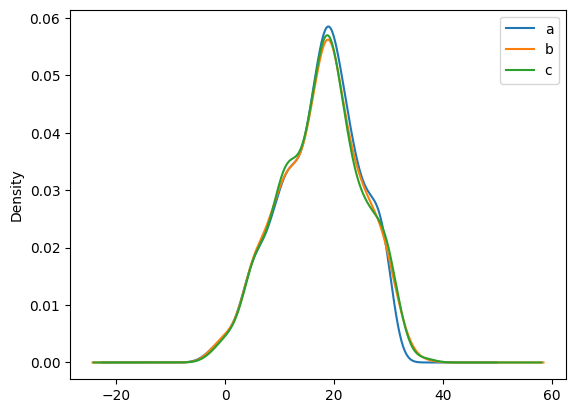

In [144]:
# temp plot
df = pd.DataFrame({'a': temp_hum_a['temp_C'], 'b': temp_hum_b['temp_C'], 'c': temp_hum_c['temp_C']})
ax = df.plot.kde()

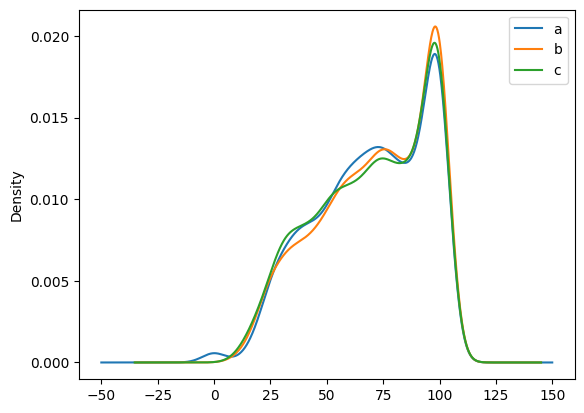

In [145]:
# humidity plot
df = pd.DataFrame({'a': temp_hum_a['hum_RH'], 'b': temp_hum_b['hum_RH'], 'c': temp_hum_c['hum_RH']})
ax = df.plot.kde()

In [109]:
temp_hum_a.sort_values(by='date_time')
temp_hum_b.sort_values(by='date_time')
temp_hum_c.sort_values(by='date_time')
display(temp_hum_a.head())
display(temp_hum_b.head())
display(temp_hum_c.head())

,date_time,temp_C,hum_RH
0,2014-03-14 17:31:00,17.16219,23.475
1,2014-03-14 18:31:00,16.50121,22.769
2,2014-03-14 19:31:00,15.84665,25.357
3,2014-03-14 20:31:00,15.60761,25.122
4,2014-03-14 21:31:00,15.47507,25.827


,date_time,temp_C,hum_RH
0,2014-03-14 17:32:00,17.11048,24.388
1,2014-03-14 18:32:00,16.04527,26.270
2,2014-03-14 19:32:00,15.04107,28.387
3,2014-03-14 20:32:00,14.35932,30.033
4,2014-03-14 21:32:00,14.17560,29.798


,date_time,temp_C,hum_RH
0,2014-03-14 17:33:00,16.85333,23.761
1,2014-03-14 18:33:00,15.84090,25.808
2,2014-03-14 19:33:00,14.92707,27.854
3,2014-03-14 20:33:00,14.37089,28.309
4,2014-03-14 21:33:00,14.21901,29.674


#### Based on the above plots, the data is very similar ans represents the same timeframe. So for simplicity, the temp_hum_a dataset will be used from now on. 

In [6]:
# modify dtype
temp_hum_a['date_time'] = pd.to_datetime(temp_hum_a.date_time)
display(temp_hum_a.head())

,date_time,temp_C,hum_RH
0,2014-03-14 17:31:00,17.16219,23.475
1,2014-03-14 18:31:00,16.50121,22.769
2,2014-03-14 19:31:00,15.84665,25.357
3,2014-03-14 20:31:00,15.60761,25.122
4,2014-03-14 21:31:00,15.47507,25.827


In [7]:
temp_hum_a.describe(datetime_is_numeric=True)

,date_time,temp_C,hum_RH
count,2161,2161.000000,2161.000000
mean,2014-04-28 17:31:00.000000256,17.284567,69.684272
min,2014-03-14 17:31:00,-4.514270,0.000000
25%,2014-04-06 05:31:00,12.121350,52.088000
50%,2014-04-28 17:31:00,18.086740,72.133000
75%,2014-05-21 05:31:00,22.387620,92.354000
max,2014-06-12 17:31:00,31.725210,100.000000
std,NaN,7.300777,24.320896


# Sam Houston project

In [13]:
temp_hum = pd.read_csv('data/sam_houston/Logger C.csv',
                          header=None, skiprows=5, usecols=[1,2,3])
temp_hum.columns = ['date_time', 'temp_C', 'hum_RH']

In [14]:
display(temp_hum.head())
print(temp_hum.shape)

,date_time,temp_C,hum_RH
0,04/07/2015 09:01,16.145 °C,65.4 %RH
1,04/07/2015 10:01,16.819 °C,79.1 %RH
2,04/07/2015 11:01,17.922 °C,95.5 %RH
3,04/07/2015 12:01,15.991 °C,100.0 %RH
4,04/07/2015 13:01,16.507 °C,100.0 %RH


(16307, 3)


In [15]:
print(temp_hum.info())
print(temp_hum.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16307 entries, 0 to 16306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  16307 non-null  object
 1   temp_C     16307 non-null  object
 2   hum_RH     16307 non-null  object
dtypes: object(3)
memory usage: 382.3+ KB
None
               date_time     temp_C     hum_RH
count              16307      16307      16307
unique             16307      11356        353
top     04/07/2015 09:01  26.282 °C  100.0 %RH
freq                   1          7       3534


In [16]:
# process temp and hum columns
temp_hum['temp_C'] = temp_hum['temp_C'].str.split(expand=True)[0]
temp_hum['hum_RH'] = temp_hum['hum_RH'].str.split(expand=True)[0]

temp_hum = temp_hum.astype({'temp_C':'float','hum_RH':'float'})

display(temp_hum.head())

,date_time,temp_C,hum_RH
0,04/07/2015 09:01,16.145,65.4
1,04/07/2015 10:01,16.819,79.1
2,04/07/2015 11:01,17.922,95.5
3,04/07/2015 12:01,15.991,100.0
4,04/07/2015 13:01,16.507,100.0


In [78]:
# modify dtype
temp_hum['date_time'] = pd.to_datetime(temp_hum.date_time).dt.strftime('%Y-%m-%d %H:%M')
temp_hum['date_time'] = pd.to_datetime(temp_hum.date_time)

display(temp_hum.head(10))
print(temp_hum.info())

,date_time,temp_C,hum_RH
0,2015-04-07 09:01:00,16.145,65.4
1,2015-04-07 10:01:00,16.819,79.1
2,2015-04-07 11:01:00,17.922,95.5
3,2015-04-07 12:01:00,15.991,100.0
4,2015-04-07 13:01:00,16.507,100.0
5,2015-04-07 14:01:00,16.589,100.0
6,2015-04-07 15:01:00,16.981,100.0
7,2015-04-07 16:01:00,16.491,100.0
8,2015-04-07 17:01:00,16.576,100.0
9,2015-04-07 18:01:00,16.595,100.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16307 entries, 0 to 16306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  16307 non-null  datetime64[ns]
 1   temp_C     16307 non-null  float64       
 2   hum_RH     16307 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 382.3 KB
None


In [79]:
temp_hum.describe(datetime_is_numeric=True)

,date_time,temp_C,hum_RH
count,16307,16307.000000,16307.000000
mean,2016-03-12 02:01:00.000000512,16.601271,70.338861
min,2015-04-07 09:01:00,-12.285000,0.000000
25%,2015-09-24 05:31:00,10.773500,55.100000
50%,2016-03-12 02:01:00,18.061000,80.200000
75%,2016-08-28 22:31:00,23.100500,97.900000
max,2017-02-14 19:01:00,35.988000,100.000000
std,NaN,8.857740,31.905459


# UTK Tox

In [33]:
'''
# convert xslx to csv
directory = 'data/utk_tox/'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        if f[-4:] == 'xlsx':
            print(f)
            if f == 'data/utk_tox/Tox001 ADH Calculations Completed.xlsx':
                pd.read_excel(f,header=None, skiprows=5, usecols=[2,4,5]).to_csv(f[:-4]+'csv', 
                                                                             index=False, 
                                                                             header=None, sep=',')
            
            else:
                pd.read_excel(f,header=None, skiprows=5, usecols=[1,2,3]).to_csv(f[:-4]+'csv', 
                                                                             index=False, 
                                                                             header=None, sep=',')

# Performed in command line:            
# for several file: sed -i '/Time/d' file.csv
# sed -i 's/43552.71875/2019-03-28 17:14:00/g' Tox\ 002\ ADH\ Calculations\ \(1\).csv
'''

data/utk_tox/Tox 013 ADH Calculations Completed.xlsx
data/utk_tox/Tox019 temperature data.xlsx
data/utk_tox/Tox007 ADH Calculations Completed.xlsx
data/utk_tox/Tox015 ADH Calculations Completed.xlsx
data/utk_tox/Tox010 ADH Calculations Completed.xlsx
data/utk_tox/TOX004 ADH Calculations Completed.xlsx
data/utk_tox/Tox016 ADH Calculations Completed.xlsx
data/utk_tox/Tox001 ADH Calculations Completed.xlsx
data/utk_tox/Tox 021 Temperature.xlsx
data/utk_tox/Tox009 ADH Calculations Completed.xlsx
data/utk_tox/TOX008 ADH Calculations.xlsx
data/utk_tox/Tox 022 Temperature.xlsx
data/utk_tox/Tox006 ADH Calculations Completed .xlsx
data/utk_tox/Tox 002 ADH Calculations (1).xlsx
data/utk_tox/Tox 003 ADH Calculations Completed.xlsx
data/utk_tox/Tox 012 ADH Calculations Completed.xlsx
data/utk_tox/Tox011 ADH Calculations Completed.xlsx
data/utk_tox/Tox014 ADH Calculations Completed.xlsx
data/utk_tox/TOX005 ADH Calculations Completed .xlsx
data/utk_tox/Tox018 Collective ADD and ADH data.xlsx


In [147]:
'''
# process all files into single file called processed_temp_hum.csv
directory = 'data/utk_tox/'
df_ls = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        if f[-3:] == 'csv':
            print(f)
            df = pd.read_csv(f,header=None)
            df.columns = ['date_time', 'temp_C', 'hum_RH']
            df['date_time'] = pd.to_datetime(df.date_time, errors='coerce')
            
            if df.temp_C.dtype == 'object':
                df['temp_C'] = df['temp_C'].str.split(expand=True)[0]
                df['hum_RH'] = df['hum_RH'].str.split(expand=True)[0]
                df = df.astype({'temp_C':'float'})
            
            if df.hum_RH.dtype == 'object':
                df['hum_RH'] = df['hum_RH'].str.split(expand=True)[0]
                df = df.astype({'hum_RH':'float'})
            
            if len(df[df['date_time'].isnull()]) != 0:
                display(df[df['date_time'].isnull()])
                
            df_ls.append(df)

df_concat = pd.concat(df_ls)
df_concat.to_csv('data/utk_tox/processed_temp_hum.csv', index=False)
'''

data/utk_tox/Tox 013 ADH Calculations Completed.csv
data/utk_tox/Tox019 temperature data.csv
data/utk_tox/Tox007 ADH Calculations Completed.csv
data/utk_tox/Tox015 ADH Calculations Completed.csv
data/utk_tox/Tox010 ADH Calculations Completed.csv
data/utk_tox/TOX004 ADH Calculations Completed.csv
data/utk_tox/Tox016 ADH Calculations Completed.csv
data/utk_tox/Tox 021 Temperature.csv
data/utk_tox/Tox009 ADH Calculations Completed.csv
data/utk_tox/TOX008 ADH Calculations.csv
data/utk_tox/Tox 022 Temperature.csv
data/utk_tox/Tox006 ADH Calculations Completed .csv
data/utk_tox/Tox 002 ADH Calculations (1).csv
data/utk_tox/Tox 003 ADH Calculations Completed.csv
data/utk_tox/Tox 012 ADH Calculations Completed.csv
data/utk_tox/Tox011 ADH Calculations Completed.csv
data/utk_tox/Tox014 ADH Calculations Completed.csv
data/utk_tox/TOX005 ADH Calculations Completed .csv
data/utk_tox/Tox018 Collective ADD and ADH data.csv
data/utk_tox/Tox001 ADH Calculations Completed.csv


In [80]:
tox_temp_hum = pd.read_csv('data/utk_tox/processed_temp_hum.csv').sort_values('date_time')
print(tox_temp_hum.shape)
display(tox_temp_hum.head())
display(tox_temp_hum.tail())
display(tox_temp_hum.info())

(24943, 3)


,date_time,temp_C,hum_RH
22731,2019-02-25 16:46:00,20.316,26.844
22732,2019-02-25 17:46:00,18.981,20.045
22733,2019-02-25 18:46:00,8.344,31.712
22734,2019-02-25 19:46:00,7.207,32.686
22735,2019-02-25 20:46:00,5.844,49.607


,date_time,temp_C,hum_RH
17527,2021-08-13 03:44:00,23.97841,90.592
17528,2021-08-13 04:44:00,23.89702,92.649
17529,2021-08-13 05:44:00,23.12671,96.176
17530,2021-08-13 06:44:00,22.79525,97.058
17531,2021-08-13 07:44:00,22.72148,98.822


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24943 entries, 22731 to 17531
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  24943 non-null  object 
 1   temp_C     24943 non-null  float64
 2   hum_RH     24943 non-null  float64
dtypes: float64(2), object(1)
memory usage: 779.5+ KB


None

In [81]:
# change dtype
tox_temp_hum['date_time'] = pd.to_datetime(tox_temp_hum['date_time'])

In [82]:
tox_temp_hum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24943 entries, 22731 to 17531
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  24943 non-null  datetime64[ns]
 1   temp_C     24943 non-null  float64       
 2   hum_RH     24943 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 779.5 KB


In [83]:
tox_temp_hum.describe(datetime_is_numeric=True)

,date_time,temp_C,hum_RH
count,24943,24943.000000,24943.000000
mean,2020-03-18 20:01:25.488513792,15.737101,73.291921
min,2019-02-25 16:46:00,-9.726850,0.000000
25%,2019-06-30 23:49:00,9.098500,58.500000
50%,2020-02-10 16:09:00,16.849020,78.400000
75%,2020-11-27 06:14:00,22.334000,94.413000
max,2021-08-13 07:44:00,42.184000,100.000000
std,NaN,8.531775,24.728624


# Merge temp/hum data from all three projects

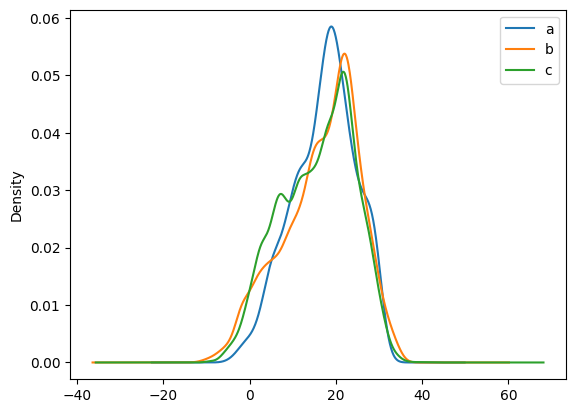

In [57]:
df = pd.DataFrame({'a': temp_hum_a['temp_C'], 'b': temp_hum['temp_C'], 'c': tox_temp_hum['temp_C']})
ax = df.plot.kde()

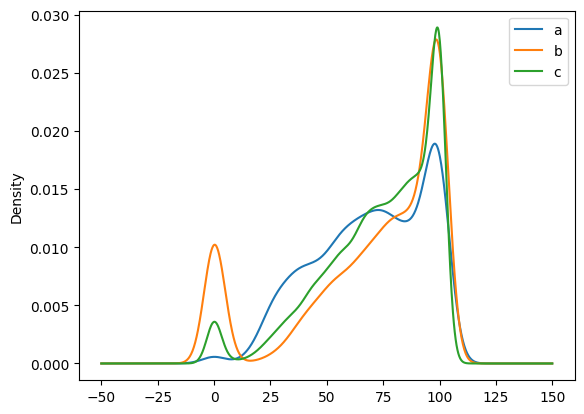

In [58]:
df = pd.DataFrame({'a': temp_hum_a['hum_RH'], 'b': temp_hum['hum_RH'], 'c': tox_temp_hum['hum_RH']})
ax = df.plot.kde()

In [59]:
# merge data
frames = [temp_hum_a, temp_hum, tox_temp_hum]
temp_hum_merged = pd.concat(frames)
display(temp_hum_merged.head())
print(temp_hum_a.shape, temp_hum.shape, tox_temp_hum.shape, temp_hum_merged.shape)

,date_time,temp_C,hum_RH
0,2014-03-14 17:31:00,17.16219,23.475
1,2014-03-14 18:31:00,16.50121,22.769
2,2014-03-14 19:31:00,15.84665,25.357
3,2014-03-14 20:31:00,15.60761,25.122
4,2014-03-14 21:31:00,15.47507,25.827


(2161, 3) (16307, 3) (24943, 3) (43411, 3)


In [60]:
# modify dtype
temp_hum_merged['date_time'] = pd.to_datetime(temp_hum_merged['date_time'])

In [61]:
temp_hum_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43411 entries, 0 to 17531
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43411 non-null  datetime64[ns]
 1   temp_C     43411 non-null  float64       
 2   hum_RH     43411 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 MB


In [62]:
temp_hum_merged.describe(datetime_is_numeric=True)

,date_time,temp_C,hum_RH
count,43411,43411.000000,43411.000000
mean,2018-05-30 09:41:01.694501632,16.138753,72.003038
min,2014-03-14 17:31:00,-12.285000,0.000000
25%,2016-04-03 12:31:00,9.918660,57.100000
50%,2019-04-30 17:19:00,17.402000,78.700000
75%,2020-03-20 03:39:00,22.651000,95.800000
max,2021-08-13 07:44:00,42.184000,100.000000
std,NaN,8.613110,27.666212


<AxesSubplot: xlabel='date_time'>

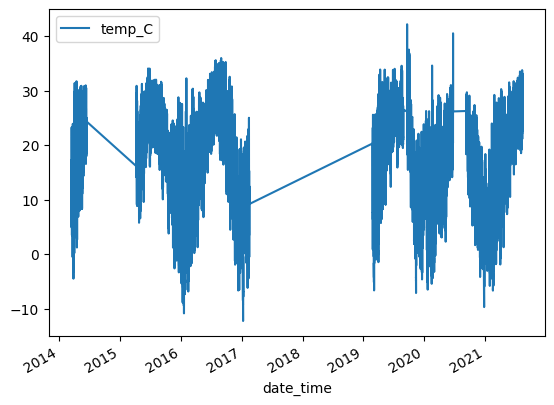

In [63]:
# temp plot
ax = plt.gca() 
temp_hum_merged.plot( x = 'date_time' , y = 'temp_C', ax = ax)

<AxesSubplot: xlabel='date_time'>

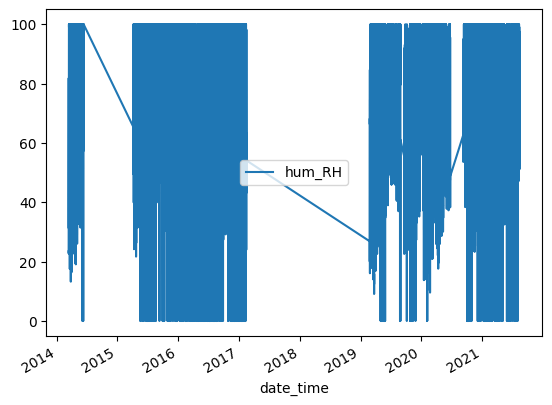

In [64]:
# hum plot
ax = plt.gca() 
temp_hum_merged.plot( x = 'date_time' , y = 'hum_RH' , ax = ax )

In [67]:
# pickle object to file
temp_hum_merged[['date_time', 'temp_C', 'hum_RH']].to_pickle('data/project_data_merged_processed.pkl')

# Analyze data

In [69]:
temp_hum_merged = pd.read_pickle('data/project_data_merged_processed.pkl')
display(temp_hum_merged.head())
print(temp_hum_merged.shape)

,date_time,temp_C,hum_RH
0,2014-03-14 17:31:00,17.16219,23.475
1,2014-03-14 18:31:00,16.50121,22.769
2,2014-03-14 19:31:00,15.84665,25.357
3,2014-03-14 20:31:00,15.60761,25.122
4,2014-03-14 21:31:00,15.47507,25.827


(43411, 3)


In [74]:
temp_hum_merged.describe(datetime_is_numeric=True)

,date_time,temp_C,hum_RH
count,43411,43411.000000,43411.000000
mean,2018-05-30 09:41:01.694501632,16.138753,72.003038
min,2014-03-14 17:31:00,-12.285000,0.000000
25%,2016-04-03 12:31:00,9.918660,57.100000
50%,2019-04-30 17:19:00,17.402000,78.700000
75%,2020-03-20 03:39:00,22.651000,95.800000
max,2021-08-13 07:44:00,42.184000,100.000000
std,NaN,8.613110,27.666212


In [85]:
# when relative humidity is 0%
display(temp_hum_merged[temp_hum_merged.hum_RH == 0].describe(datetime_is_numeric=True))
temp_hum_merged[temp_hum_merged.hum_RH == 0].shape 

# A RH of 0% is impossible since there is always some water vapor in the air. Also, -3 degrees Celcius in 
# June is very unlikely. These seem to be errors and cast doubt on the accuracy of the data. 

,date_time,temp_C,hum_RH
count,2337,2337.000000,2337.0
mean,2017-07-26 20:15:17.894736896,14.566023,0.0
min,2014-06-04 23:31:00,-3.434000,0.0
25%,2016-01-16 04:01:00,9.314000,0.0
50%,2016-08-03 08:01:00,15.674000,0.0
75%,2019-08-26 04:49:00,20.428000,0.0
max,2021-08-01 07:44:00,30.670000,0.0
std,NaN,7.069198,0.0


(2337, 3)

In [96]:
# when temp is negative and in spring/summer months
display(temp_hum_merged[(temp_hum_merged.temp_C < 0) & (temp_hum_merged.date_time.dt.month.isin([3,4,5,6,7,8]))].head())
temp_hum_merged[(temp_hum_merged.temp_C < 0) & (temp_hum_merged.date_time.dt.month.isin([3,4,5,6,7,8]))].tail()

,date_time,temp_C,hum_RH
157,2014-03-21 06:31:00,-0.03983,95.821
158,2014-03-21 07:31:00,-0.55280,96.399
227,2014-03-24 04:31:00,-0.37679,76.290
228,2014-03-24 05:31:00,-1.06874,80.185
229,2014-03-24 06:31:00,-1.56193,80.741


,date_time,temp_C,hum_RH
14323,2021-04-02 07:44:00,-1.47569,74.338
14324,2021-04-02 08:44:00,-0.79230,74.906
14345,2021-04-03 05:44:00,-0.16427,90.886
14346,2021-04-03 06:44:00,-0.71235,90.298
14347,2021-04-03 07:44:00,-0.79060,86.251
